- Human error level is 71%
- compatitive ai level is 91 to 97%

# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
df_cancer = pd.DataFrame(np.c_[data['data'], data['target']], columns = np.append(data['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# STEP #2: VISUALIZING THE DATA

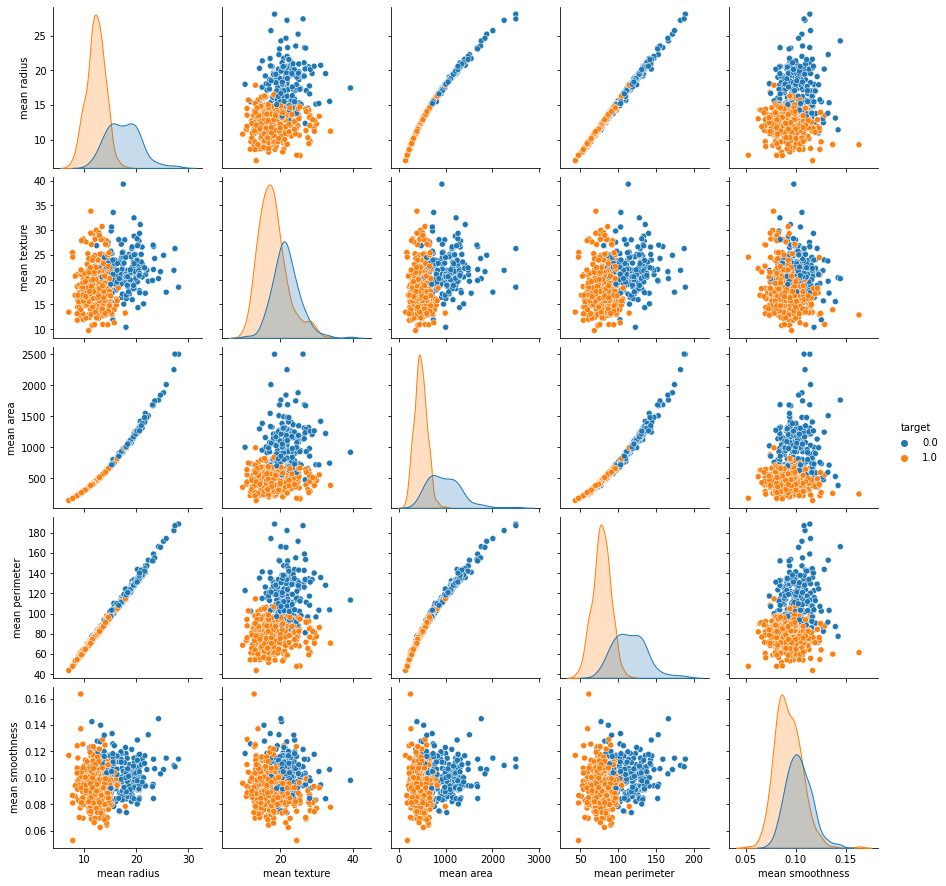

In [5]:
sns.pairplot(df_cancer, hue= 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

<AxesSubplot:xlabel='target', ylabel='count'>

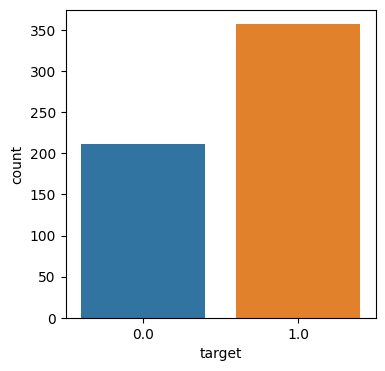

In [6]:
plt.figure(figsize=(4,4))
sns.countplot(x= df_cancer['target'])

<AxesSubplot:>

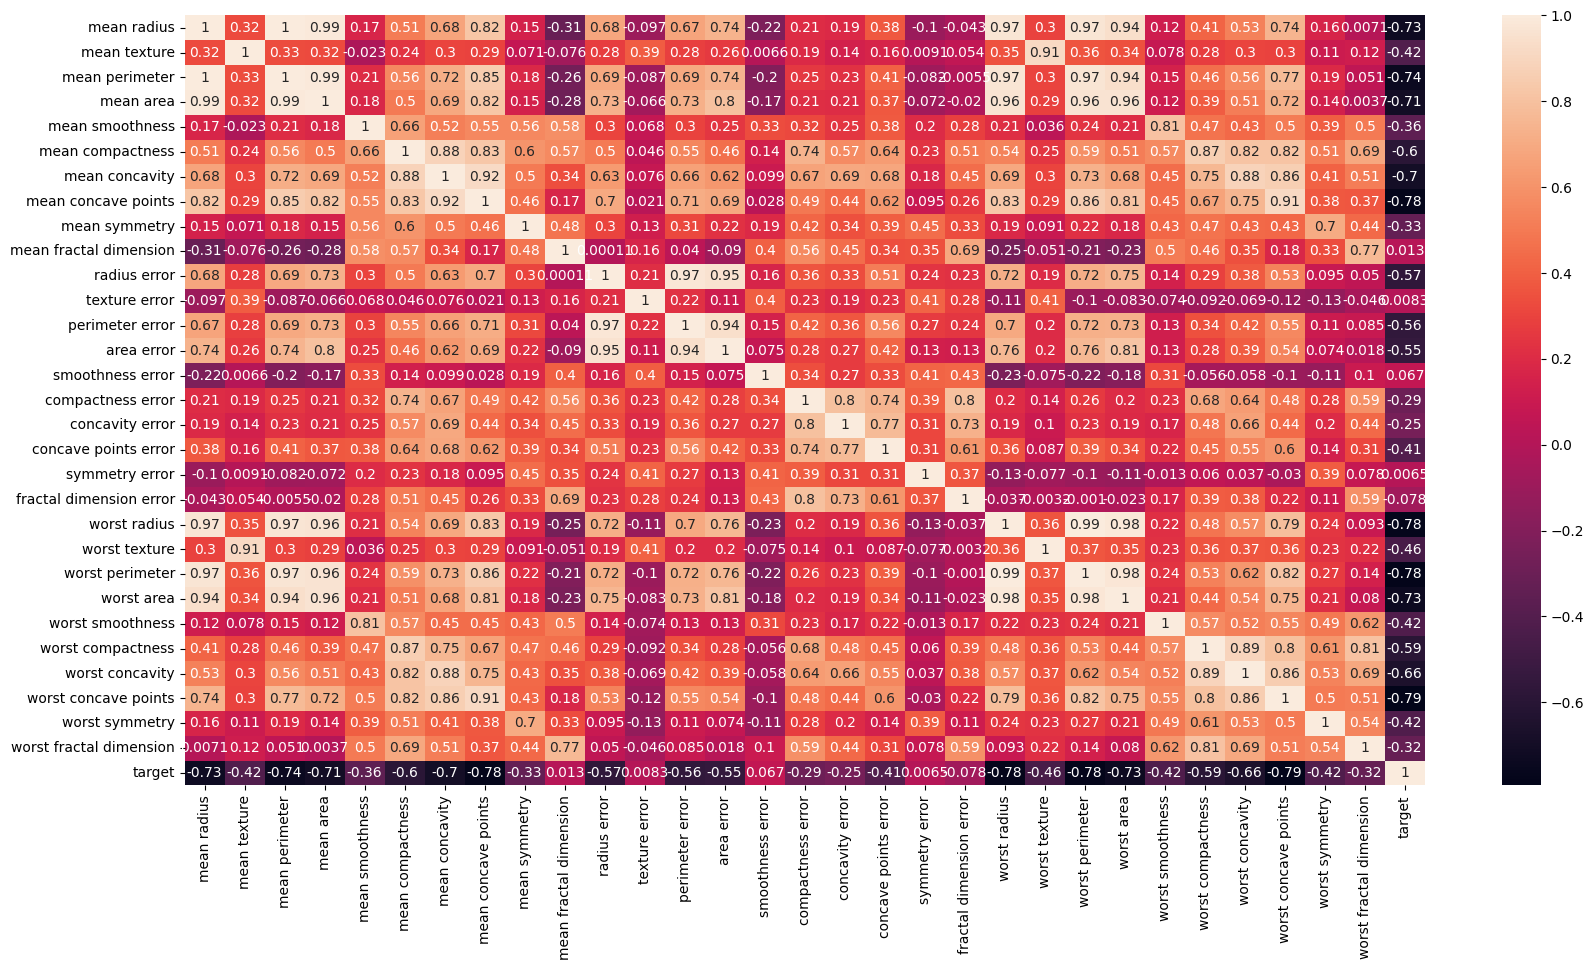

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot=True)

Data is cleaned so there is no need to cleaning data step

# STEP #3: SPLIT then PREPROCESSING DATA

In [8]:
x = df_cancer.drop(columns=['target'], axis=1)
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
y = df_cancer['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# STEP #4: MODELS TRAINING && Evaluation
we will use:
- SVM
- KNN
- RandomForest
- XGBoost

Train Accuracy: 1.0 Train Accuracy: 0.9385964912280702


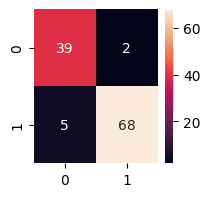

In [13]:
from sklearn.svm import SVC 
svm_model = SVC(C=10, gamma=0.1, kernel='rbf')
svm_model.fit(x_train, y_train)

# support vector machine evaluation
y_hat_train = svm_model.predict(x_train)
y_hat_test = svm_model.predict(x_test)
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_hat_test),annot=True)
print(f"Train Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train)} Train Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test)}")

Train Accuracy: 1.0 Train Accuracy: 0.9912280701754386


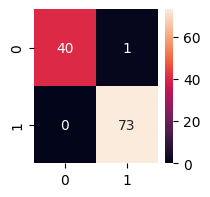

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=5, n_estimators=50, max_depth=10)
rfc.fit(x_train, y_train)

# random forest
y_hat_train = rfc.predict(x_train)
y_hat_test = rfc.predict(x_test)
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_hat_test),annot=True)
print(f"Train Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train)} Train Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test)}")


(0.9692307692307692, 0.9824561403508771)

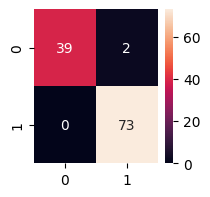

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

# KNN evaluation
y_hat_train = knn.predict(x_train)
y_hat_test = knn.predict(x_test)
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_hat_test),annot=True)
accuracy_score(y_true=y_train, y_pred=y_hat_train), accuracy_score(y_true=y_test, y_pred=y_hat_test)

Train Accuracy: 1.0 Train Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        41
         1.0       0.96      0.99      0.97        73

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



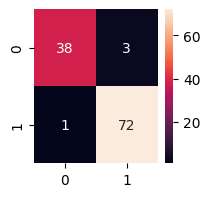

In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=5, n_estimators=50, max_depth=10)
xgb.fit(x_train, y_train)

# xgboost evaluation
y_hat_train = xgb.predict(x_train)
y_hat_test = xgb.predict(x_test)
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_hat_test),annot=True)
print(f"Train Accuracy: {accuracy_score(y_true=y_train, y_pred=y_hat_train)} Train Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test)}")
print(classification_report(y_true=y_test, y_pred=y_hat_test))

# STEP #5: Hyperparams Tuning

In [17]:
#SVM Tuning
params = {'C': [0.1, 1, 10, 100],
               'gamma':[1, 0.1, 0.01, 0.001],
               'kernel':['linear', 'rbf']}
svm_grid = GridSearchCV(estimator=SVC(), param_grid=[params], refit=True, verbose=5)
svm_grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['linear', 'rbf']}],
             verbose=5)

In [18]:
svm_grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

<AxesSubplot:>

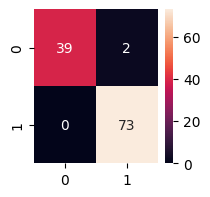

In [19]:
grid_hat = svm_grid.predict(x_test)
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, grid_hat), annot=True)

In [20]:
#Random forest Tuning
params = {'n_estimators': [100, 120],
               'max_depth':[7, 10],
               'max_features':[0.8, 1]}
rfc_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=5), param_grid=[params], refit=True, verbose=5)
rfc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=7, max_features=0.8, n_estimators=100;, score=0.967 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=0.8, n_estimators=100;, score=0.967 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=0.8, n_estimators=100;, score=0.934 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=0.8, n_estimators=100;, score=0.945 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=0.8, n_estimators=100;, score=0.956 total time=   0.1s
[CV 1/5] END max_depth=7, max_features=0.8, n_estimators=120;, score=0.967 total time=   0.1s
[CV 2/5] END max_depth=7, max_features=0.8, n_estimators=120;, score=0.967 total time=   0.1s
[CV 3/5] END max_depth=7, max_features=0.8, n_estimators=120;, score=0.934 total time=   0.1s
[CV 4/5] END max_depth=7, max_features=0.8, n_estimators=120;, score=0.945 total time=   0.1s
[CV 5/5] END max_depth=7, max_features=0.8, n_estimators=120;, score=0.967 total time=   0.1s


GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid=[{'max_depth': [7, 10], 'max_features': [0.8, 1],
                          'n_estimators': [100, 120]}],
             verbose=5)

In [21]:
rfc_grid.best_params_

{'max_depth': 7, 'max_features': 0.8, 'n_estimators': 120}

<AxesSubplot:>

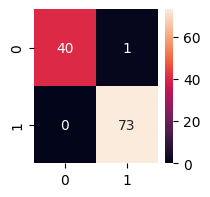

In [22]:
grid_hat = rfc_grid.predict(x_test)
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test, grid_hat), annot=True)

# Random forest

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        41
         1.0       0.99      1.00      0.99        73

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



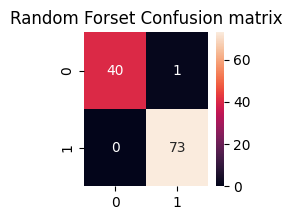

In [23]:
bst_rfc = rfc_grid.best_estimator_
#rfc = RandomForestClassifier(random_state=5, n_estimators=50, max_depth=10)
bst_rfc.fit(x_train, y_train)

# random forest
y_hat_train = bst_rfc.predict(x_train)
y_hat_test = bst_rfc.predict(x_test)
print(classification_report(y_true=y_test, y_pred=y_hat_test))
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_hat_test),annot=True)
plt.title("Random Forset Confusion matrix")
plt.show()

- In this project we care to reduce type two error as much as possible, so random forest is the good one for this